In [ ]:
try:
  import google.colab
  IS_COLAB_ENV = True
except:
  IS_COLAB_ENV = False
IS_COLAB_ENV

True

In [ ]:
if IS_COLAB_ENV:
    !pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 75kB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 450kB 39.1MB/s 
     |████████████████████████████████| 3.8MB 42.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=fce1f28aed49d868c6277dac7536f630b1ce41c072a06a70b3d4479f2bcf2195
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstal

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dogandcat.jpg to dogandcat.jpg
Saving humanandmonkey.jpg to humanandmonkey.jpg


In [ ]:
ls

catgrad_cam.png        dogandcat.jpg    humanandmonkeygrad_cam.png
cat.jpg                doggrad_cam.png  humanandmonkey.jpg
dogandcatgrad_cam.png  dog.jpg          sample_data/


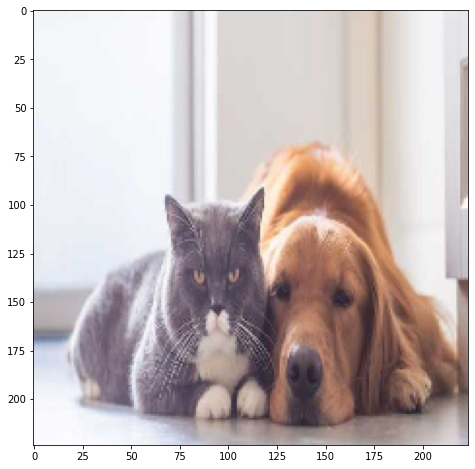

In [ ]:
img_path = 'dogandcat.jpg'
img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.show()

In [ ]:
#pretrained model requires resizing our image to 224x224 pixels
#pretrained models require batch of images as input, so when only one image is available, the dimension needs to be changes from 3 to 4 -> expand_dims

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array,axis=0)

In [ ]:
model = tf.keras.applications.resnet50.ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
# decode_predictions function gives the probability of each category of objects contained in the image

In [ ]:
def classify(img_path):
  img = image.load_img(img_path, target_size=(224,224))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array,axis=0)
  img_preprocessed = preprocess_input(img_batch)
  prediction = model.predict(img_preprocessed)
  print(decode_predictions(prediction,top=3)[0])

In [ ]:
classify(img_path) #test 1

[('n02090379', 'redbone', 0.44541678), ('n02088466', 'bloodhound', 0.056636408), ('n02808304', 'bath_towel', 0.046547204)]


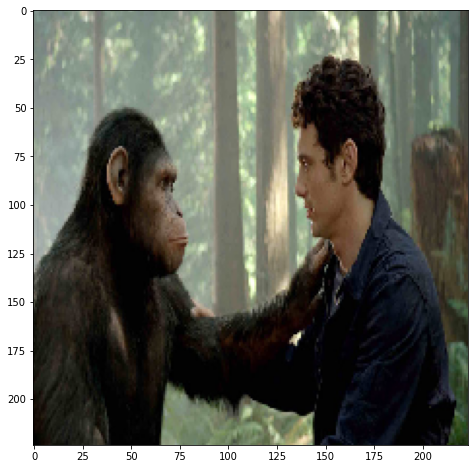

In [ ]:
img_path = 'humanandmonkey.jpg'
img = image.load_img(img_path,target_size=(224,224))
plt.imshow(img)
plt.show()

In [ ]:
classify(img_path)

[('n02481823', 'chimpanzee', 0.93120515), ('n02493793', 'spider_monkey', 0.01487772), ('n02480855', 'gorilla', 0.013746998)]


In [ ]:
# dataset to be used: ResNet50 
# overlay a class activation map (or a heatmap) on top of the video in order to understand what the network pays attention to 

In [ ]:
pip install keras-vis --user

# Creating heat map for the image :

In [ ]:
!pip install tensorflow-gpu==2.0.0
!pip install tf-explain==0.1.0

     |████████████████████████████████| 380.8MB 43kB/s 


In [ ]:
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
from tf_explain.core.activations import ExtractActivations

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

Pass an image, its ImageNet object ID along with a model into tf-explain’s functions. The object id is needed as tf.explain needs to figure out what is activated for that particular class.


In [ ]:
IMAGE_PATHS = ['dogandcat.jpg','humanandmonkey.jpg']

In [ ]:
def display_images(paths):
  # figure size in inches optional
  rcParams['figure.figsize'] = 11 ,8
  
  # read images
  img_A = mpimg.imread(paths[0])
  img_B = mpimg.imread(paths[-1])
  
  # display images
  fig, ax = plt.subplots(1,2)
  ax[0].imshow(img_A);
  ax[1].imshow(img_B);

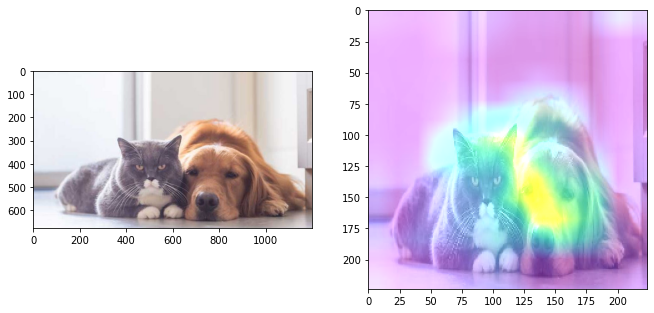

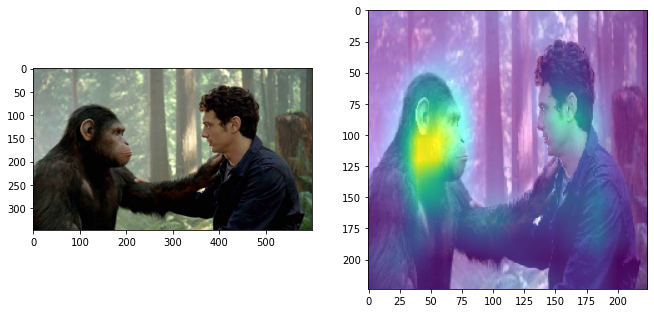

In [ ]:
indices = [263, 281]

layers_name = ['activation_6']

from IPython.display import Image

for i in range(len(IMAGE_PATHS)):
    each_path = IMAGE_PATHS[i]
    index = indices[i]

    img = tf.keras.preprocessing.image.load_img(each_path,
                                                target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    data = ([img], None)
    # Define name with which to save the result as
    name = each_path.split("/")[-1].split(".jpg")[0]

    #Save the Grad Cam visualization
    explainer = GradCAM()
    model = tf.keras.applications.vgg16.VGG16(weights='imagenet',
                                              include_top=True)
    grid = explainer.explain(data, model, 'block5_conv3', index)
    explainer.save(grid, '.', name + 'grad_cam.png')
    display_images([each_path, name + 'grad_cam.png'])

In [ ]:
# test on Video: use ffmpeg to split up the video into individual frames (at 25 frames per sec) and get heat map on each of the frames.